In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

import tensorflow as tf
import keras

In [8]:
def create_random_im(shape_):
    length = shape_[0]*shape_[1]*shape_[2]
    im = np.random.rand(length)
    im = np.reshape(im, shape_)
    # return to_3d(im)
    return im

def create_random_arr(shape_):
    length = shape_[0]*shape_[1]*shape_[2]
    im = np.arange(0,length)
    im = np.reshape(im, shape_)
    # return to_3d(im)
    return im

def create_ons(arr):
    return np.ones_like(arr)

def to_3d(im):
    return np.dstack((im, im, im))

def image_entropy(im):
    im_ent = 0
    for idx in range(3):
        im_ent += channel_entropy(im[:, :, idx])
    a, b, c = im.shape
    no_pixels = a*b*c
    im_ent = im_ent/no_pixels
    # im_ent = im_ent/3
    return im_ent

def channel_entropy(ch):
    ch_ent = 0
    _, counts = np.unique(ch, return_counts=True)
    for count in counts:
        p = count/ch.size
        ch_ent += Entropy(p)
    return ch_ent

def Entropy(p):
    H = -(p * math.log2(p))
    return H

In [9]:
# ones_im = create_ons(mnist_im)

In [10]:
# ones_im[:,:,2] = (ones_im[:,:,2]*255)

In [11]:
# red_im = np.zeros(mnist_im.shape, np.uint8)
# red_im[:] = (0, 0, 1)

In [12]:
# plt.imshow(red_im)

In [13]:
_, (mnist, _) = keras.datasets.mnist.load_data()
_, (fmnist, _) = keras.datasets.fashion_mnist.load_data()
_, (cifar10, _) = keras.datasets.cifar10.load_data()

# 804, 26, 12
mnist_im = mnist[1]/255
fmnist_im = fmnist[1]/255
cifar10_im = cv2.resize(cifar10[804], dsize=mnist_im.shape, interpolation=cv2.INTER_CUBIC)
# cifar10_grey_im = to_3d(cv2.cvtColor(cifar10_im, cv2.COLOR_RGB2GRAY))/255
cifar10_im = cifar10_im/255
mnist_im = to_3d(mnist_im)
fmnist_im = to_3d(fmnist_im)
rand_im = create_random_im(mnist_im.shape)
rand_arr = create_random_arr(mnist_im.shape)
red_im = np.zeros(mnist_im.shape, np.uint8)
red_im[:] = (255, 0, 0)
red_im = red_im/255
own_im = cv2.resize(cv2.cvtColor(cv2.imread("white_house_brown_cow.png"),cv2.COLOR_BGR2RGB)/255, (28, 28))

# images = [mnist_im, fmnist_im, cifar10_im, cifar10_grey_im, rand_im, ones_im, own_im]
images = [mnist_im, fmnist_im, cifar10_im, rand_im, red_im, own_im]
# titles = np.array(['mnist','fmnist','cifar10','cifar10grey','rand_im','ones_im','own_im'])
titles = np.array(['mnist','fmnist','cifar10','rand','red','3u'])

def encoded_length(img):
  return len(cv2.imencode('.png',img, [int(cv2.IMWRITE_PNG_COMPRESSION),9])[1])

encoding_complexity = list(map(encoded_length, images))
image_entropies = list(map(image_entropy, images))

rel_complexities = encoding_complexity/np.max(encoding_complexity)
rel_entropies = image_entropies/np.max(image_entropies)

for im in images:
  print(np.max(im), np.min(im))
# plt.imshow(cv2.cvtColor(cifar10_im, cv2.COLOR_RGB2BGR))
# plt.show()

170498071/170498071 [==============================] - 4s 0us/step
1.0 0.0
1.0 0.0
1.0 0.12549019607843137
0.9990349321529881 0.0008352532240438748
1.0 0.0
0.9996998799519808 0.0


In [14]:
#  1. keep original size, calc. the overall entropy/px
#  3. .png

In [15]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

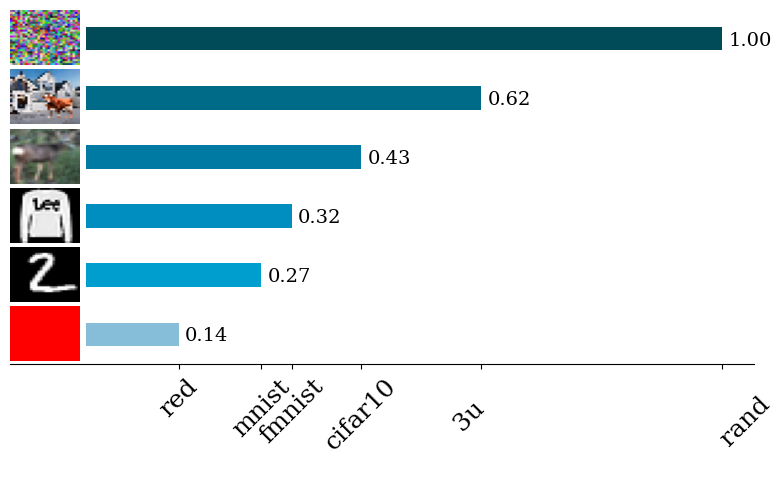

In [53]:
p = rel_complexities.argsort()

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False

pp = plt.figure(figsize=(8, 5))
labels = titles[p]
colors = ['#86BEDA','#009dcf','#008dc0','#007aa2','#006a89','#004b57']
values = rel_complexities[p]
sorted_im = np.array(images)[p]

height = 0.4
plt.barh(y=labels, width=values, height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):

    img = sorted_im[i]
    # plt.imshow(img, extent=[value + 0.01, value + 0.11, i - height / 2 - 0.25, i + height / 2+0.275], aspect='auto', zorder=2)
    plt.imshow(img, extent=[-0.12, -0.01, i - height / 2 - 0.25, i + height / 2+0.275], aspect='auto', zorder=2)

for i, v in enumerate(values):
    plt.text(v+0.01, i-0.1, f'{float(str(v)[:4]):.2f}', fontsize=14)

plt.xlim(-0.12, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xticks(values, labels, rotation=45, fontsize=18)
plt.yticks([])
plt.tight_layout()
plt.savefig('rel_comp.png')
plt.show()

In [54]:
titles = np.array(['mnist','fmnist','cifar10','\n     rand','red','3u    '])

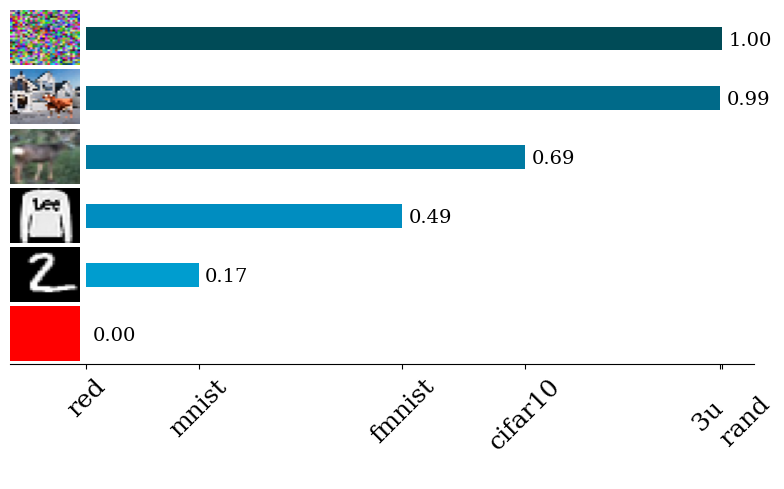

In [59]:
p = rel_entropies.argsort()

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False

pp = plt.figure(figsize=(8, 5))
labels = titles[p]
colors = ['#86BEDA','#009dcf','#008dc0','#007aa2','#006a89','#004b57']
values = rel_entropies[p]
sorted_im = np.array(images)[p]

height = 0.4
plt.barh(y=labels, width=values, height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):

    img = sorted_im[i]
    # plt.imshow(img, extent=[value + 0.01, value + 0.11, i - height / 2 - 0.25, i + height / 2+0.275], aspect='auto', zorder=2)
    plt.imshow(img, extent=[-0.12, -0.01, i - height / 2 - 0.25, i + height / 2+0.275], aspect='auto', zorder=2)

for i, v in enumerate(values):
    plt.text(v+0.01, i-0.1, f'{float(str(v)[:4]):.2f}', fontsize=14)

plt.xlim(-0.12, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
xTicks = plt.xticks(values, labels, rotation=45, fontsize=18)
plt.yticks([])
plt.tight_layout()
plt.savefig('rel_ent.png')
plt.show()

In [ ]:
xTicks

([<matplotlib.axis.XTick at 0x7b19651cc6d0>,
 [Text(0.0, 0, 'red'),
  Text(0.17707563819950167, 0, 'mnist'),
  Text(0.4970656247163906, 0, 'fmnist'),
  Text(0.6906172821295552, 0, 'cifar10'),
  Text(0.9969812826728722, 0, '3U-VQA'),
  (1.0, 2, 'rand')])

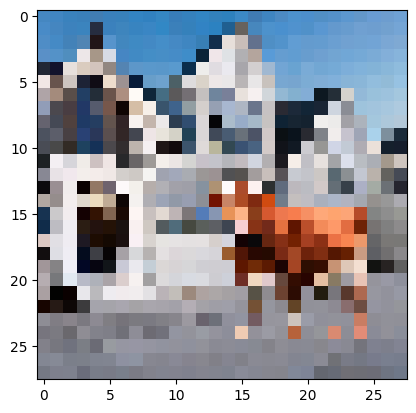

In [ ]:
plt.imshow(own_im)

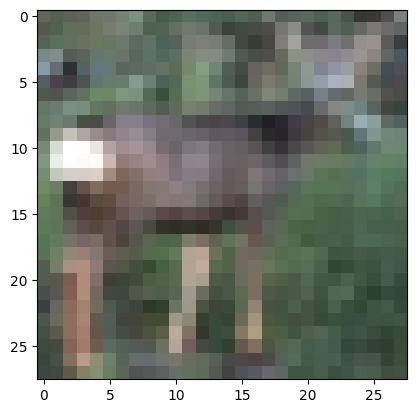

In [ ]:
plt.imshow(cifar10_im)